# ODE.jl : Ordinary Differential Equation
* 상미방을 수치해석적 방법으로 푸는 모듈
* https://github.com/JuliaDiffEq/ODE.jl

In [1]:
Pkg.add("ODE")

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of ODE
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [2]:
using ODE

INFO: Precompiling module ODE.


## Solve a Simple ODE
* http://nbviewer.jupyter.org/github/JuliaLang/ODE.jl/blob/master/examples/Simple_Differential_Equation.ipynb

우선, 파라미터 y를 시간 t에 대해 미분한 함수 f를 정의한다.

$$
y' = f(t,y)
$$

이걸 정확히 쓰면 이렇게 될 것이다.

$$
y'(t) = f(t,y(t))
$$

그리고, 풀고자 하는 미분방정식을 이렇게 정해 보자.

$$
0 = x''(t) + x(t)
$$

2차 미방이므로, 이걸 매개함수 v를 이용하여 2개의 1차 미방으로 풀어서 쓸 수 있다.

$$
\begin{cases}
  x'(t) = v(t)  \\
  v'(t) = -x(t)
\end{cases}
$$

이렇게 된 문제를 $f(t,y)$ 함수로 코딩하면 아래와 같다.

In [10]:
function f(t, y)
    # Extract the components of the y vector
    (x, v) = y
    
    # Our system of differential equations
    x_prime = v
    v_prime = -x
    
    # Return the derivatives as a vector
    [x_prime; v_prime]
end;

이제 초기조건 및 시간 t 정의역의 계산 범위를 정의해 준다.

In [4]:
# Initial condtions -- x(0) and x'(0)
const starty = [0.0; 0.1]

# Time vector going from 0 to 2*PI in 0.01 increments
time = 0:0.1:4*pi;

이제 푼다.

In [5]:
t, y = ode45(f, starty, time);

In [6]:
x = map(y -> y[1], y)
v = map(y -> y[2], y);

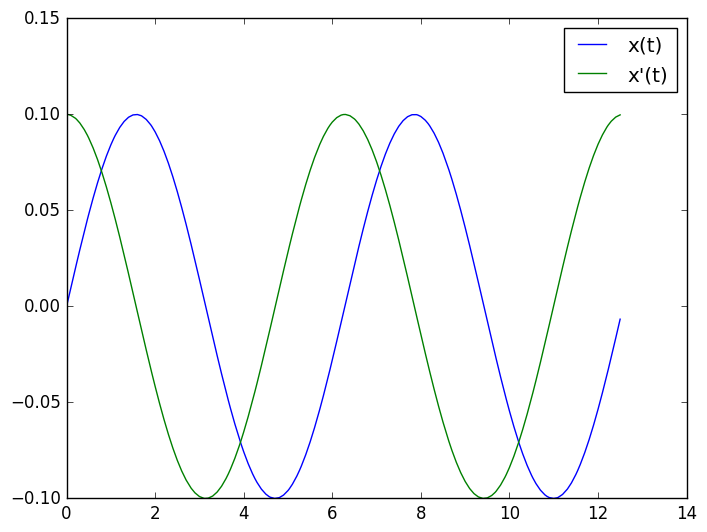

In [7]:
using PyPlot

plot(t, x, label="x(t)")
plot(t, v, label="x'(t)")
legend();

## Terminal Velocity
* http://nbviewer.jupyter.org/github/JuliaLang/ODE.jl/blob/master/examples/Terminal_Velocity.ipynb